In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

https://www.pacificclimate.org/data/station-hydrologic-model-output

One CSV file that contains streamflow for the PNWNAmet historical run and 12 CMIP5 scenarios is provided for each station. The first column is the date, followed by PNWNAmet-driven streamflow and then a column each for the 12 CMIP5 scenarios listed by GCM/RCP/run (i.e. ACCESS1-0_rcp85_r1i1p1). Streamflow is provided in cubic metres per second (m3 s-1).

To test the ability of the VIC-GL RVIC model to replicate streamflow in your watershed of interest, compare PNWNAmet values to observed streamflow. To look at the impact of climate change on streamflow, it is suggested that one compare the future to the past within the same GCM/RCP/run, such as mean daily streamflow from 2041-2070 versus 1971-2000 for ACCESS1-0_rcp85_r1i1p1.

##### (y axis everywhere where not specified m3/s)

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import arrow
import glob
import netCDF4 as nc
import pickle
import cmocean as cm
import datetime as dt
from datetime import datetime, timedelta

In [4]:

colnames = ['Date','PNWNAmet',
            
            'ACCESS_45','CanESM_45','CCSM4_45',
           'CNRM_45', 'HadGEM2_45', 'MPI_45',
            'ACCESS_85','CanESM_85','CCSM4_85',
           'CNRM_85', 'HadGEM2_85', 'MPI_85',]

FD = pd.read_csv('FRSHP_nohead.csv',delimiter = ',',names=colnames)
FD['Date'] = pd.to_datetime(FD['Date'])
FD['PNWNAmet'] = pd.to_numeric(FD['PNWNAmet'], errors='coerce')



In [5]:
mask_mod02 = (FD['Date'] >= dt.datetime(2002,1,1)) & (FD['Date']  < dt.datetime(2007,1,2))
mask_mod52 = (FD['Date']  >= dt.datetime(2052,1,1)) & (FD['Date']  < dt.datetime(2057,1,1))
mask_mod92 = (FD['Date']  >= dt.datetime(2092,1,1)) & (FD['Date']  < dt.datetime(2097,1,1))


# Comparison of projections of Fraser discharge - 6 models (from CMIP5), 2 scenarios (RCP 8.5 vs 4.5) for 2002-2007, 2052-57, 2092-97

Text(0.5, 0.98, 'Comparison of Fraser discharge patterns accross 6 models \n (solid lines = RCP 4.5; dotted lines = RCP 8.5 scenario)')

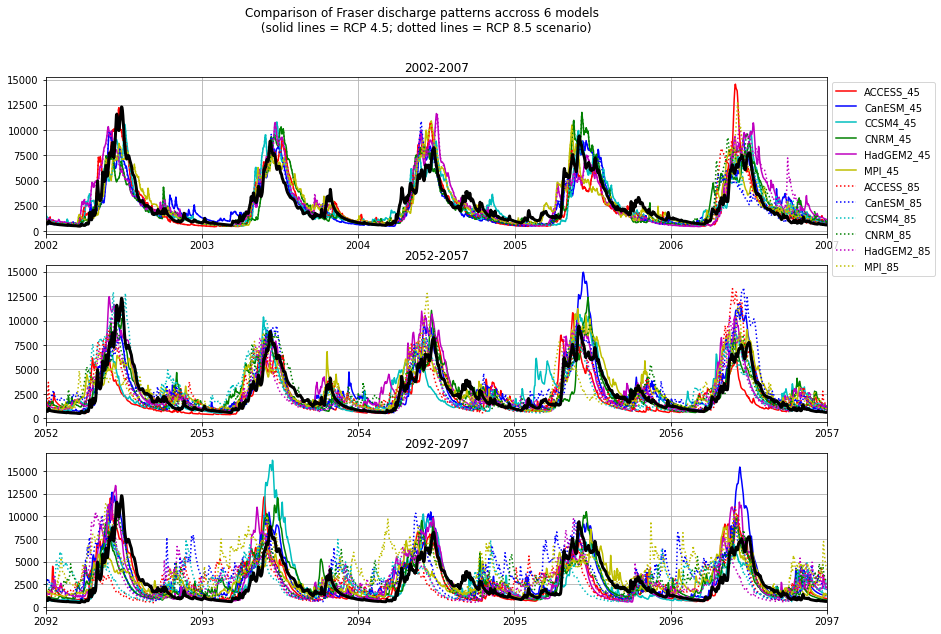

In [21]:
cnames_45 = ['ACCESS_45','CanESM_45','CCSM4_45',
            'CNRM_45', 'HadGEM2_45', 'MPI_45']
cnames_85 = ['ACCESS_85','CanESM_85','CCSM4_85',
            'CNRM_85', 'HadGEM2_85', 'MPI_85']
cols = ['r','b','c','g','m','y']
fact = 0.7
fig, axs = plt.subplots(3,1, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
    
 
for j in range(0,len(cnames_45)):        
    axs[0].plot(FD['Date'][mask_mod02],FD[cnames_45[j]][mask_mod02],color = cols[j],\
                label = cnames_45[j], linestyle = '-')
    axs[1].plot(FD['Date'][mask_mod52],FD[cnames_45[j]][mask_mod52],color = cols[j],\
                label = cnames_45[j], linestyle = '-')
    axs[2].plot(FD['Date'][mask_mod92],FD[cnames_45[j]][mask_mod92],color = cols[j],\
                label = cnames_45[j], linestyle = '-')
    
for j in range(0,len(cnames_85)):        
    axs[0].plot(FD['Date'][mask_mod02],FD[cnames_85[j]][mask_mod02],color = cols[j],\
                label = cnames_85[j], linestyle = ':')
    axs[1].plot(FD['Date'][mask_mod52],FD[cnames_85[j]][mask_mod52],color = cols[j],\
                label = cnames_85[j], linestyle = ':')
    axs[2].plot(FD['Date'][mask_mod92],FD[cnames_85[j]][mask_mod92],color = cols[j],\
                label = cnames_85[j], linestyle = ':')

   
axs[0].set_xlim(dt.datetime(2002,1,1) , dt.datetime(2007,1,1))
axs[1].set_xlim(dt.datetime(2052,1,1) , dt.datetime(2057,1,1))
axs[2].set_xlim(dt.datetime(2092,1,1) , dt.datetime(2097,1,1))
axs[0].legend(bbox_to_anchor = [1,1])
axs[0].set_title('2002-2007')
axs[1].set_title('2052-2057')
axs[2].set_title('2092-2097')
axs[0].grid(); axs[1].grid(); axs[2].grid()

axs[0].plot(FD['Date'][mask_mod02],FD['PNWNAmet'][mask_mod02],color = 'k', \
            linewidth = 3, label = 'real discharge (\'02-\'07)', linestyle = '-')
axs[1].plot(FD['Date'][mask_mod52],FD['PNWNAmet'][mask_mod02],color = 'k', \
            linewidth = 3, label = 'real discharge (\'02-\'07)', linestyle = '-')
axs[2].plot(FD['Date'][mask_mod92],FD['PNWNAmet'][mask_mod02],color = 'k', \
            linewidth = 3, label = 'real discharge (\'02-\'07)', linestyle = '-')

plt.suptitle('Comparison of Fraser discharge patterns accross 6 models \n (solid lines = RCP 4.5; dotted lines = RCP 8.5 scenario)')

In [7]:
cnames_45 = ['ACCESS_45','CanESM_45','CCSM4_45',
            'CNRM_45', 'HadGEM2_45', 'MPI_45']
cnames_85 = ['ACCESS_85','CanESM_85','CCSM4_85',
            'CNRM_85', 'HadGEM2_85', 'MPI_85']

#peak of freshet - mag
fresh_peaks = np.zeros([2,6,2100-1945])

fresh_days = np.zeros([2,6,2100-1945])
#cnames

for y in range(1945,2100):
    for c in range(0,len(cnames_45)):
        mask = (FD['Date'] >= dt.datetime(y,1,1)) & (FD['Date']  < dt.datetime(y+1,1,1))
        tseg = FD[cnames_45[c]][mask]
        fresh_peaks[0,c,y-1945] = np.max(tseg)
        q = np.where(tseg ==  np.max(tseg)); fresh_days[0,c,y-1945] = (q[0][0])
        
        tseg = FD[cnames_85[c]][mask]
        fresh_peaks[1,c,y-1945] = np.max(tseg)   
        q = np.where(tseg ==  np.max(tseg)); fresh_days[1,c,y-1945] = (q[0][0])

In [8]:

#total discharge
tot_wat = np.zeros([2,6,2100-1945])



for y in range(1945,2100):
    for c in range(0,len(cnames_45)):
        mask = (FD['Date'] >= dt.datetime(y,1,1)) & (FD['Date']  < dt.datetime(y+1,1,1))
        tseg = FD[cnames_45[c]][mask]
        tot_wat[0,c,y-1945] = np.nansum(tseg)
        tseg = FD[cnames_85[c]][mask]
        tot_wat[1,c,y-1945] = np.nansum(tseg)   


## has peak freshet moved? magnitude and timing?

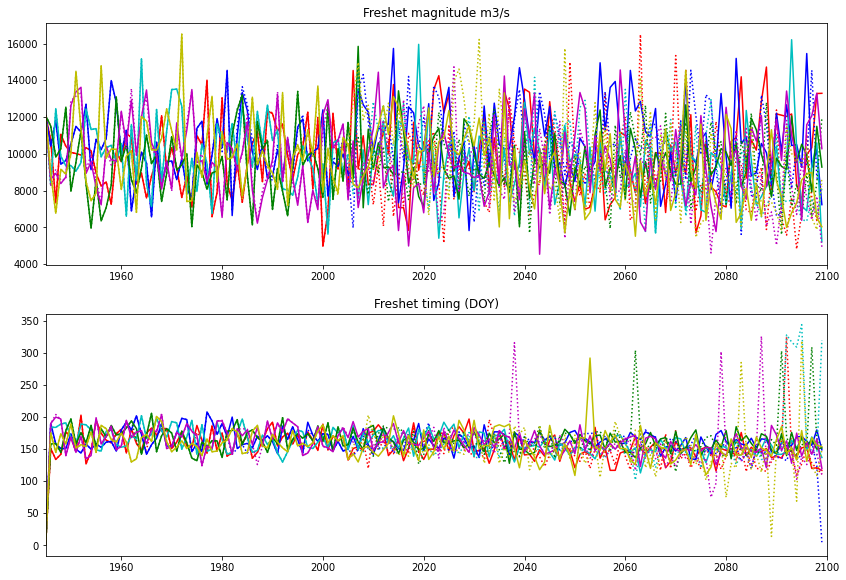

In [9]:
fact = 0.7
fig, axs = plt.subplots(2,1, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
yrs = np.arange(1945,2100,1)

for c in range(0,len(cnames_45)):
    axs[0].plot(yrs,fresh_peaks[0,c,:], color = cols[c],linestyle = '-')
    axs[0].plot(yrs,fresh_peaks[1,c,:], color = cols[c],linestyle = ':')
    axs[0].set_title('Freshet magnitude m3/s'),

for c in range(0,len(cnames_45)):
    axs[1].plot(yrs,fresh_days[0,c,:], color = cols[c],linestyle = '-')
    axs[1].plot(yrs,fresh_days[1,c,:], color = cols[c],linestyle = ':')
    axs[1].set_title('Freshet timing (DOY)')
    axs[0].set_xlim(1945,2100), axs[1].set_xlim(1945,2100)
 

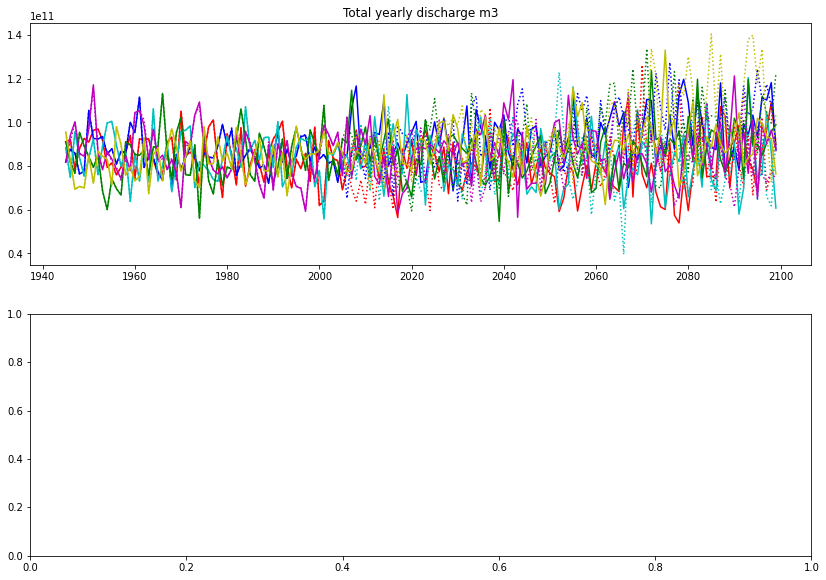

In [22]:
sid = 60*60*24
fact = 0.7
fig, axs = plt.subplots(2,1, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
yrs = np.arange(1945,2100,1)

for c in range(0,len(cnames_45)):
    axs[0].plot(yrs,tot_wat[0,c,:]*sid, color = cols[c],linestyle = '-')
    axs[0].plot(yrs,tot_wat[1,c,:]*sid, color = cols[c],linestyle = ':')
    axs[0].set_title('Total yearly discharge m3'),


In [11]:
print('mean freshet day, 1946-1956, scenario 4.5' )
print(np.mean(fresh_days[0,:,1:11]))
print('mean freshet day, 1946-1956, scenario 8.5')
print(np.mean(fresh_days[1,:,1:11]))
print('mean freshet day,  2090-2099, scenario 4.5' )
print(np.mean(fresh_days[0,:,(2100-1955):(2100-1945)]))
print('mean freshet day, 2090-2099, scenario 8.5')
print(np.mean(fresh_days[1,:,(2100-1955):(2100-1945)]))

mean freshet day, 1946-1956, scenario 4.5
165.63333333333333
mean freshet day, 1946-1956, scenario 8.5
165.61666666666667
mean freshet day,  2090-2099, scenario 4.5
152.53333333333333
mean freshet day, 2090-2099, scenario 8.5
164.51666666666668


In [12]:
cnames_45 = ['ACCESS_45','CanESM_45','CCSM4_45',
            'CNRM_45', 'HadGEM2_45', 'MPI_45']
cnames_85 = ['ACCESS_85','CanESM_85','CCSM4_85',
            'CNRM_85', 'HadGEM2_85', 'MPI_85']

#peak of freshet - mag
sorted_discharge_1946_1951 = np.zeros([2,6,5,365])
sorted_discharge_2094_2099 = np.zeros([2,6,5,365])


for y in range(1946,1951):
    mask = (FD['Date'] >= dt.datetime(y,1,1)) & (FD['Date']  < dt.datetime(y+1,1,1))
    for c in range(0,len(cnames_45)):
       sorted_discharge_1946_1951[0,c,y-1946,:]  = np.sort(FD[cnames_45[c]][mask])[::-1][0:365]
       sorted_discharge_1946_1951[1,c,y-1946,:]  = np.sort(FD[cnames_85[c]][mask])[::-1][0:365]

for y in range(2094,2099):
    mask = (FD['Date'] >= dt.datetime(y,1,1)) & (FD['Date']  < dt.datetime(y+1,1,1))
    for c in range(0,len(cnames_45)):
       sorted_discharge_2094_2099[0,c,y-2094,:]  = np.sort(FD[cnames_45[c]][mask])[::-1][0:365]
       sorted_discharge_2094_2099[1,c,y-2094,:]  = np.sort(FD[cnames_85[c]][mask])[::-1][0:365]

In [13]:
# fact = 0.7
# fig, axs = plt.subplots(2,1, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

# for c in range(0,6):
#     for y in range(0,5):
#         axs[0].plot(np.arange(0,365,1),sorted_discharge_1946_1951[0,c,y,:], color = cols[c],linestyle = '-')
#         axs[0].plot(np.arange(0,365,1),sorted_discharge_1946_1951[1,c,y,:], color = cols[c],linestyle = ':')
        
#         axs[1].plot(np.arange(0,365,1),sorted_discharge_2094_2099[0,c,y,:], color = cols[c],linestyle = '-')
#         axs[1].plot(np.arange(0,365,1),sorted_discharge_2094_2099[1,c,y,:], color = cols[c],linestyle = ':')

Text(0, 0.5, 'm3/s')

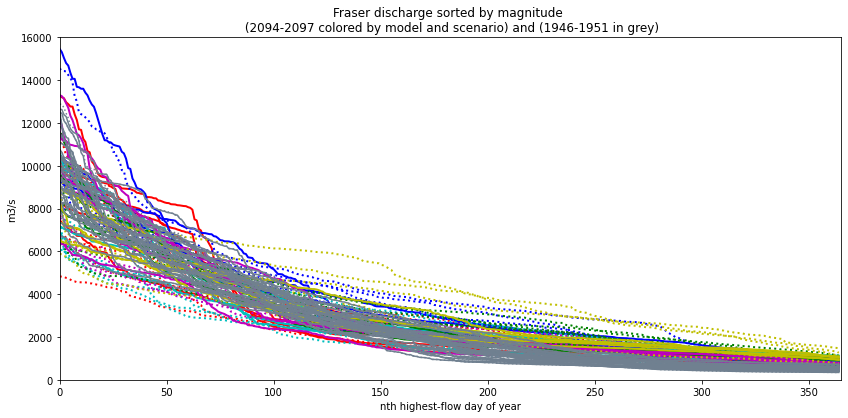

In [23]:
fact = 0.7
fig, axs = plt.subplots(1,1, figsize=(20*fact, 9*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

for c in range(0,6):
    for y in range(0,5):

        axs.plot(np.arange(0,365,1),sorted_discharge_2094_2099[0,c,y,:], linewidth = 2, color = cols[c],linestyle = '-')
        axs.plot(np.arange(0,365,1),sorted_discharge_2094_2099[1,c,y,:], linewidth = 2, color = cols[c],linestyle = ':')
        
for c in range(0,6):
    for y in range(0,5):
        
        axs.plot(np.arange(0,365,1),sorted_discharge_1946_1951[0,c,y,:], color = 'slategrey',linestyle = '-')
        axs.plot(np.arange(0,365,1),sorted_discharge_1946_1951[1,c,y,:], color = 'slategrey',linestyle = ':')

axs.set_title('Fraser discharge sorted by magnitude \n (2094-2097 colored by model and scenario) and (1946-1951 in grey)')
axs.set_xlim([0,365]); axs.set_ylim([0,16000]); axs.set_xlabel('nth highest-flow day of year'); axs.set_ylabel('m3/s')

In [24]:
cnames_45 = ['ACCESS_45','CanESM_45','CCSM4_45',
            'CNRM_45', 'HadGEM2_45', 'MPI_45']
cnames_85 = ['ACCESS_85','CanESM_85','CCSM4_85',
            'CNRM_85', 'HadGEM2_85', 'MPI_85']

#peak of freshet - mag
discharge_1946_1951 = np.zeros([2,6,5,365])
discharge_2050_2055 = np.zeros([2,6,5,365])
discharge_2094_2099 = np.zeros([2,6,5,365])


for y in range(1946,1951):
    mask = (FD['Date'] >= dt.datetime(y,1,1)) & (FD['Date']  < dt.datetime(y+1,1,1))
    for c in range(0,len(cnames_45)):
       discharge_1946_1951[0,c,y-1946,:]  = (FD[cnames_45[c]][mask])[::-1][0:365]
       discharge_1946_1951[1,c,y-1946,:]  = (FD[cnames_85[c]][mask])[::-1][0:365]

for y in range(2050,2055):
    mask = (FD['Date'] >= dt.datetime(y,1,1)) & (FD['Date']  < dt.datetime(y+1,1,1))
    for c in range(0,len(cnames_45)):
       discharge_2050_2055[0,c,y-2050,:]  = (FD[cnames_45[c]][mask])[::-1][0:365]
       discharge_2050_2055[1,c,y-2050,:]  = (FD[cnames_85[c]][mask])[::-1][0:365]
        
        
for y in range(2094,2099):
    mask = (FD['Date'] >= dt.datetime(y,1,1)) & (FD['Date']  < dt.datetime(y+1,1,1))
    for c in range(0,len(cnames_45)):
       discharge_2094_2099[0,c,y-2094,:]  = (FD[cnames_45[c]][mask])[::-1][0:365]
       discharge_2094_2099[1,c,y-2094,:]  = (FD[cnames_85[c]][mask])[::-1][0:365]
       
discharge_1946_1951_mn = np.nanmean(discharge_1946_1951,axis = 2)
discharge_2094_2099_mn = np.nanmean(discharge_2094_2099,axis = 2)
discharge_2050_2055_mn = np.nanmean(discharge_2050_2055,axis = 2)

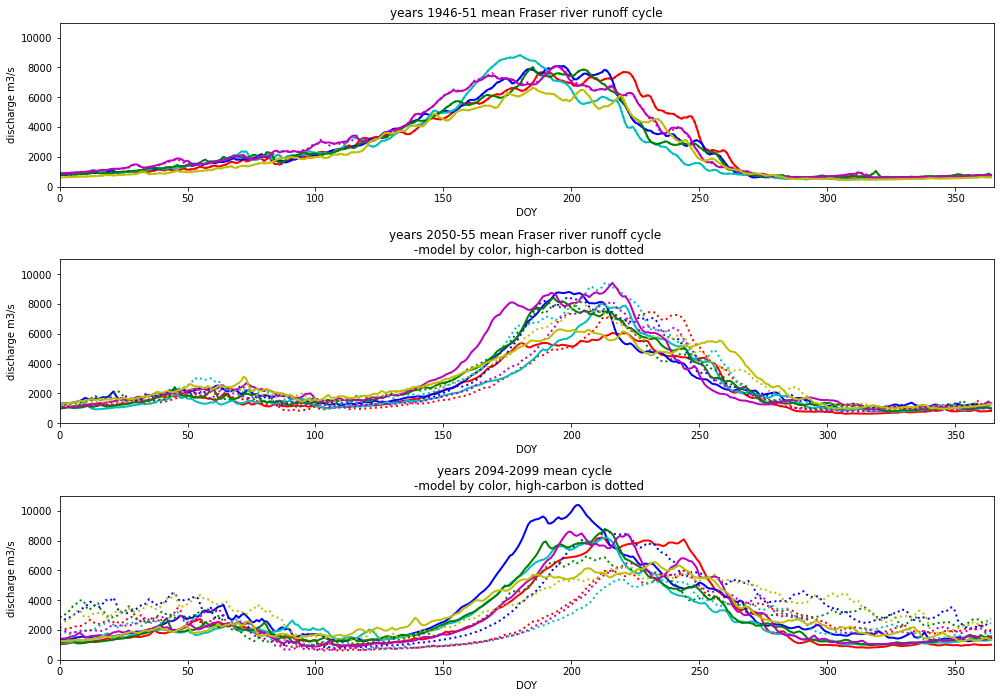

In [25]:
fact = 0.7
fig, axs = plt.subplots(3,1, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for c in range(0,6):

    axs[0].plot(np.arange(0,365,1),discharge_1946_1951_mn[0,c,:], linewidth = 2, color = cols[c],linestyle = '-')
    axs[0].plot(np.arange(0,365,1),discharge_1946_1951_mn[1,c,:], linewidth = 2, color = cols[c],linestyle = ':')
    axs[0].set_xlim([0,365]), axs[0].set_ylim([0,11000])
    axs[0].set_title('years 1946-51 mean Fraser river runoff cycle')
    
    
    axs[1].plot(np.arange(0,365,1),discharge_2050_2055_mn[0,c,:], linewidth = 2, color = cols[c],linestyle = '-')
    axs[1].plot(np.arange(0,365,1),discharge_2050_2055_mn[1,c,:], linewidth = 2, color = cols[c],linestyle = ':')
    axs[1].set_xlim([0,365]), axs[1].set_ylim([0,11000])
    axs[1].set_title('years 2050-55 mean Fraser river runoff cycle \n -model by color, high-carbon is dotted')
    
    
    
    axs[2].plot(np.arange(0,365,1),discharge_2094_2099_mn[0,c,:], linewidth = 2, color = cols[c],linestyle = '-')
    axs[2].plot(np.arange(0,365,1),discharge_2094_2099_mn[1,c,:], linewidth = 2, color = cols[c],linestyle = ':')
    axs[2].set_xlim([0,365]), axs[2].set_ylim([0,11000])
    axs[2].set_title('years 2094-2099 mean cycle \n -model by color, high-carbon is dotted')

    
for i in range(0,3):
     axs[i].set_xlabel('DOY'); axs[i].set_ylabel('discharge m3/s')
plt.tight_layout()


In [26]:
# mean_ro = np.zeros([2100-1945,6,2])
# for i in range(1945,2100):
#     mask = (Dates >= dt.datetime(i,1,1)) & (Dates < dt.datetime(i+1,1,1))
#     mean_ro[i-1945,0,0] = np.nanmean(ACCESS_45[mask]); mean_ro[i-1945,0,1] = np.nanmean(ACCESS_85[mask]); 
#     mean_ro[i-1945,1,0] = np.nanmean(CanESM2_45[mask]); mean_ro[i-1945,1,1] = np.nanmean(CanESM2_85[mask]); 
#     mean_ro[i-1945,2,0] = np.nanmean(CCSM4_45[mask]); mean_ro[i-1945,2,1] = np.nanmean(CCSM4_85[mask]); 
#     mean_ro[i-1945,3,0] = np.nanmean(CNRM_45[mask]); mean_ro[i-1945,3,1] = np.nanmean(CNRM_85[mask]); 
#     mean_ro[i-1945,4,0] = np.nanmean(HadGEM2_45[mask]); mean_ro[i-1945,4,1] = np.nanmean(HadGEM2_85[mask]); 
#     mean_ro[i-1945,5,0] = np.nanmean(MPI_45[mask]); mean_ro[i-1945,5,1] = np.nanmean(MPI_85[mask]); 

# std_ro = np.zeros([2100-1945,6,2])
# for i in range(1945,2100):
#     mask = (Dates >= dt.datetime(i,1,1)) & (Dates < dt.datetime(i+1,1,1))
#     std_ro[i-1945,0,0] = np.nanstd(ACCESS_45[mask]); std_ro[i-1945,0,1] = np.nanstd(ACCESS_85[mask]); 
#     std_ro[i-1945,1,0] = np.nanstd(CanESM2_45[mask]); std_ro[i-1945,1,1] = np.nanstd(CanESM2_85[mask]); 
#     std_ro[i-1945,2,0] = np.nanstd(CCSM4_45[mask]); std_ro[i-1945,2,1] = np.nanstd(CCSM4_85[mask]); 
#     std_ro[i-1945,3,0] = np.nanstd(CNRM_45[mask]); std_ro[i-1945,3,1] = np.nanstd(CNRM_85[mask]); 
#     std_ro[i-1945,4,0] = np.nanstd(HadGEM2_45[mask]); std_ro[i-1945,4,1] = np.nanstd(HadGEM2_85[mask]); 
#     std_ro[i-1945,5,0] = np.nanstd(MPI_45[mask]); std_ro[i-1945,5,1] = np.nanstd(MPI_85[mask]); 

# cols = ['r','b','c','g','m','y']
# fact = 0.7
# fig, axs = plt.subplots(2,1, figsize=(18*fact, 14*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

# for i in range(0,6):
#     axs[0].plot(np.arange(1945,2100,1),mean_ro[:,i,0], color = cols[i])
#     axs[0].fill_between(np.arange(1945,2100,1),\
#                         mean_ro[:,i,0]-std_ro[:,i,0],mean_ro[:,i,0]+std_ro[:,i,0], color = cols[i], alpha = 0.1)
    
#     axs[1].plot(np.arange(1945,2100,1),mean_ro[:,i,1], color = cols[i])
#     axs[1].fill_between(np.arange(1945,2100,1),\
#                         mean_ro[:,i,1]-std_ro[:,i,1],mean_ro[:,i,1]+std_ro[:,i,1], color = cols[i], alpha = 0.1)


In [18]:
# start ='2013-01-01'
# end ='2013-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# Fraser_2013 = np.zeros(dayslen)

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     yy = tdate.format('YYYY')
#     mm = tdate.format('MM')
#     dd = tdate.format('DD')
#     if i%50 == 0:
#         print(i)
#     tstr = glob.glob(f'/results/forcing/rivers/R201702DFraCElse_y{yy}m{mm}d{dd}.nc')
#     tnc = tstr[0]
#     #dis where the fraser is
#     tn = nc.Dataset(tnc)
#     ro = tn['rorunoff'][0,500,394]
#     Fraser_2013[i] = ro / 1000 * f_area
    
# start ='2014-01-01'
# end ='2014-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# Fraser_2014 = np.zeros(dayslen)

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     yy = tdate.format('YYYY')
#     mm = tdate.format('MM')
#     dd = tdate.format('DD')
#     if i%50 == 0:
#         print(i)
#     tstr = glob.glob(f'/results/forcing/rivers/R201702DFraCElse_y{yy}m{mm}d{dd}.nc')
#     tnc = tstr[0]
#     #dis where the fraser is
#     tn = nc.Dataset(tnc)
#     ro = tn['rorunoff'][0,500,394]
#     Fraser_2014[i] = ro / 1000 * f_area
    
# start ='2015-01-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# Fraser_2015 = np.zeros(dayslen)

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     yy = tdate.format('YYYY')
#     mm = tdate.format('MM')
#     dd = tdate.format('DD')
#     if i%50 == 0:
#         print(i)
#     tstr = glob.glob(f'/results/forcing/rivers/R201702DFraCElse_y{yy}m{mm}d{dd}.nc')
#     tnc = tstr[0]
#     #dis where the fraser is
#     tn = nc.Dataset(tnc)
#     ro = tn['rorunoff'][0,500,394]
#     Fraser_2015[i] = ro / 1000 * f_area
# start ='2016-01-01'
# end ='2016-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# Fraser_2016 = np.zeros(dayslen)

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     yy = tdate.format('YYYY')
#     mm = tdate.format('MM')
#     dd = tdate.format('DD')
#     if i%50 == 0:
#         print(i)
#     tstr = glob.glob(f'/results/forcing/rivers/R201702DFraCElse_y{yy}m{mm}d{dd}.nc')
#     tnc = tstr[0]
#     #dis where the fraser is
#     tn = nc.Dataset(tnc)
#     ro = tn['rorunoff'][0,500,394]
#     Fraser_2016[i] = ro / 1000 * f_area

# pickle.dump(Fraser_2013, open("Fraser_2013.pkl", 'wb'))
# pickle.dump(Fraser_2014, open("Fraser_2014.pkl", 'wb'))
# pickle.dump(Fraser_2015, open("Fraser_2015.pkl", 'wb'))
# pickle.dump(Fraser_2016, open("Fraser_2016.pkl", 'wb'))


## Fraser 2013-2016 real discharge

In [19]:
Fraser_2013 = pickle.load(open('Fraser_2013.pkl', 'rb'))  
Fraser_2014 = pickle.load(open('Fraser_2014.pkl', 'rb'))  
Fraser_2015 = pickle.load(open('Fraser_2015.pkl', 'rb'))  
Fraser_2016 = pickle.load(open('Fraser_2016.pkl', 'rb'))  


Text(0.5, 0, 'day of year')

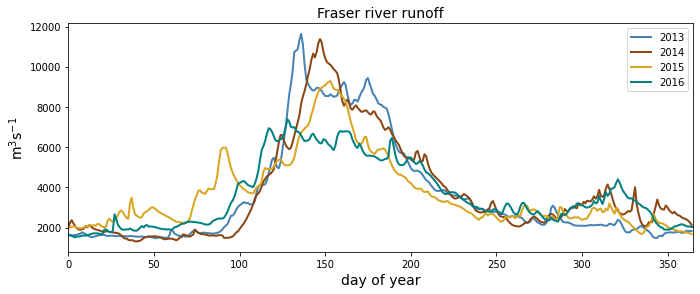

In [20]:
fact = 1.4
fig = plt.figure(figsize=(8*fact, 3*fact))
fs = 14

#summertime mean
ax = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1)
ax.plot(np.arange(0,365,1),Fraser_2013, linewidth = '2', color = 'steelblue', label = '2013')
ax.plot(np.arange(0,365,1),Fraser_2014, linewidth = '2', color = 'saddlebrown', label = '2014')
ax.plot(np.arange(0,365,1),Fraser_2015, linewidth = '2', color = 'goldenrod', label = '2015')
ax.plot(np.arange(0,366,1),Fraser_2016, linewidth = '2', color = 'teal', label = '2016')
ax.set_xlim([0,365])
ax.legend(loc='best')
ax.set_title('Fraser river runoff',fontsize = fs)
ax.set_ylabel('m$^3$s$^{-1}$', fontsize = fs)
ax.set_xlabel('day of year', fontsize = fs)

